In [ ]:
from pymatgen import MPRester                       #
                                                    #
with MPRester("MY_API_KEY") as mpr:                 # note: remplacer MY_API_KEY par une clef API
                                                    #
    data = mpr.query("mp-23040", ["cif"])[0]        # stocke le fichier cif sous la forme d'un dictionnaire  
    flux = open("Ca2PI_mp-23040.cif", "w")          #
                                                    # 
    for key, value in data.items():                 # écris un fichier cif contenant les données
        flux.write(str(value))                      # du fichier cif stocké dans data
                                                    # 
    flux.close()                                    #

In [7]:
from pymatgen.io.cif import CifParser                     #
                                                          #
parser = CifParser("Ca2PI_mp-23040.cif")                  # lis le fichier cif et stocke la  
                                                          # structure conventionnelle dans structure
structure = parser.get_structures(False)[0]               # 

In [8]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer  #
                                                           #  
sp = SpacegroupAnalyzer(structure)                         # crée un SpacegroupAnalyzer sur base de la structure 
                                                           #
st = sp.get_conventional_standard_structure()              # ces 2 lignes permettent d'obtenir une structure avec  
sp_conv = SpacegroupAnalyzer(st)                           # les Periodicsites qui serviront pour la suite
                                                           #   
rot = sp_conv.get_symmetry_dataset()['rotations']          # extrait les matrices de rotation associées aux 
trans = sp_conv.get_symmetry_dataset()['translations']     # opérations de symmétries de la structure

In [30]:
from pymatgen.core.operations import SymmOp as sym
import numpy as np
                  
# crée une liste de SymmOp sur base des matrices de rotations, ainsi qu'une 
# liste contenant les représentations xyz des opérations de symmétries 
# (les vecteurs de translation sont arrondis à 7 décimales pour éviter un "bug" à l'affichage)
                                      
symop_list = [sym.from_rotation_and_translation(rot[i],trans[i].round(7)) for i in [1,6,23]]  
xyz_list = [symop_list[i].as_xyz_string() for i in range(3)]

In [83]:
# extrait trois noeuds du réseau sous la forme de 
# PeriodicSite et les stockent dans une liste

point = [st[i] for i in [1,6,10]]  

# applique les opérations de symmétries aux noeuds choisis 

new_point = [symop_list[i].operate(point[i].coords) for i in range(3)]  

In [38]:
def frac_coords_to_cell(coords):                  #
    frac_coords = coords                          #
    for i in range(3):                            # 
        while frac_coords[i]>1.:                  # ramène un point dans la cellule
            frac_coords[i] -= 1.                  # 
        while frac_coords[i] <0.:                 #
            frac_coords[i] += 1.                  # 
    return frac_coords                            # 

In [79]:
from IPython.display import Image  

# sert à afficher l'effet des symmétries (pour que cette partie du code
# fonctionne, il est nécessaire d'uploder les 3 figures dans un dossier
# appelé img sur le notebook)

str_list = [[],[],[]] ; order = ["première","seconde","troisième"] ; img = [[],[],[]] 

for j in range(3):
    spec = str(point[j].species) ; p = point[j].frac_coords 
    coords = st.lattice.get_fractional_coords(new_point[j])
    coords = frac_coords_to_cell(coords)  
    str_list[j] = "La {n} opération de symmétrie renvoie {s}: {p} sur {s}: {o}".format(n=order[j],s=spec[:-1],p=p,o=coords)  
    img[j] = Image(filename="img/figure_{num}.PNG".format(num=j+1))     

La première opération de symmétrie renvoie Ca: [0.      0.      0.22928] sur Ca: [0.      0.      0.77072]


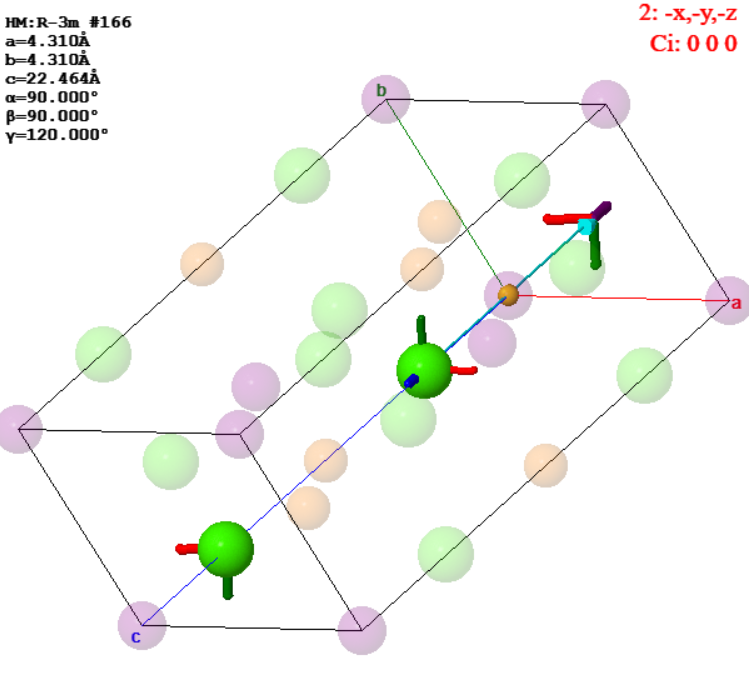

In [80]:
# centre d'inversion en (0,0,0) 
print(str_list[0])
img[0]

La seconde opération de symmétrie renvoie P: [0.33333333 0.66666667 0.16666667] sur P: [1.         0.57735027 0.83333333]


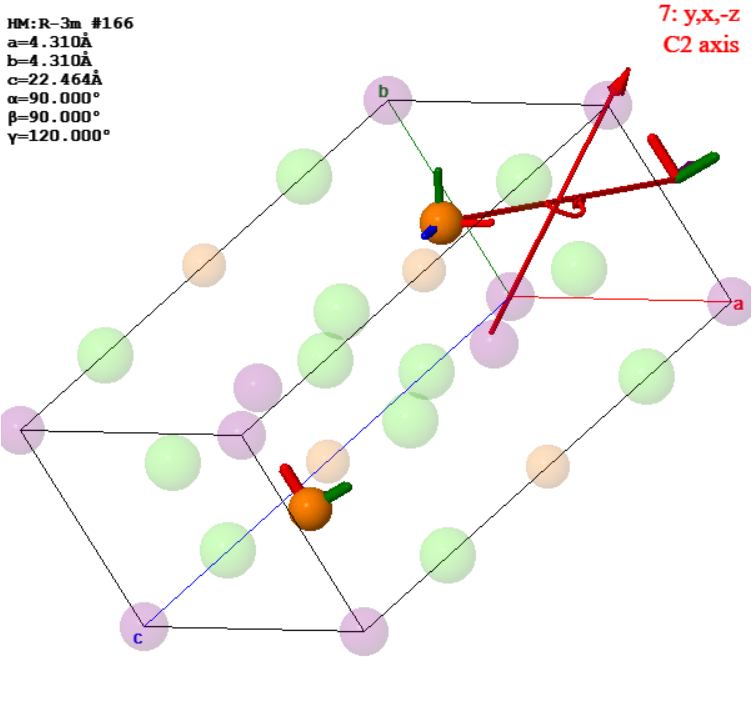

In [81]:
# axe de rotation d'ordre 2
print(str_list[1])
img[1]

La troisième opération de symmétrie renvoie I: [0.66666667 0.33333333 0.33333333] sur I: [0.15467477 0.15465384 0.34817205]


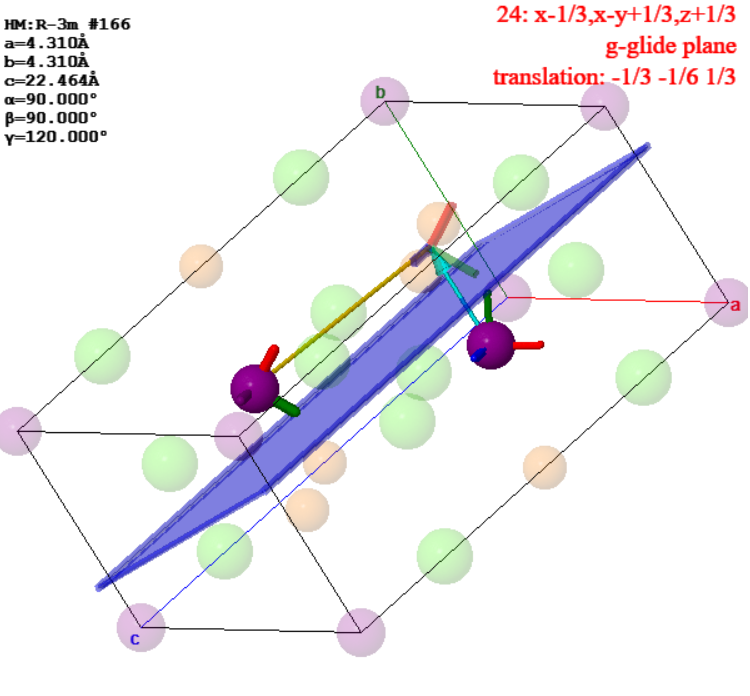

In [82]:
# plan de glissement
print(str_list[2])
img[2]